# Exploratory Data Analysis

Notebook supporting the [**Do we know our data, as good as we know our tools** talk](https://devoxxuk19.confinabox.com/talk/VEM-8021/Do_we_know_our_data_as_good_as_we_know_our_tools%3F) at [Devoxx UK 2019](http://twitter.com/@DevoxxUK).

The contents of the notebook is inspired by many sources.

### High-level steps covered:

- Know the domain knowledge
- Start with basics: get a feeling of the data
- Check descriptive statistics
- Plot distribution of features
- Check correlations between features, with target column

Steps suggested by [Machine Learning Master: Understand Your Machine Learning Data With Descriptive Statistics in Python](https://machinelearningmastery.com/understand-machine-learning-data-descriptive-statistics-python/):
- Peek at Your data
- Dimensions of Your Data
- Data Type For Each Attribute
- Descriptive Statistics
- Class Distribution (Classification Only)
- Correlation Between Attributes
- Skew of Univariate Distributions

### Resources 

- [Helpful Python Code Snippets for Data Exploration in Pandas](https://medium.com/@msalmon00/helpful-python-code-snippets-for-data-exploration-in-pandas-b7c5aed5ecb9)
- [The Ultimate Python Seaborn Tutorial: Gotta Catch ‘Em All](https://elitedatascience.com/python-seaborn-tutorial)
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)
- [Notebook on Boston Housing dataset](https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155)
#### Visualisation:

- [Fundamentals of Data Visualization](https://serialmentor.com/dataviz/)
- [Visualize Machine Learning Data in Python With Pandas](https://machinelearningmastery.com/visualize-machine-learning-data-python-pandas/)
- [Python Data Science Notebooks](https://github.com/donnemartin/data-science-ipython-notebooks)

#### Notebooks exploring the ML workflow (start-to-finish):

- [Learn Machine Learning in a Weekend: Day 1: Regression](https://colab.research.google.com/drive/19uoDyGAxJ0zCwPT6cNb1xkYOfySNZChV#scrollTo=P8BmebTwGIhS)
- [Learn Machine Learning in a Weekend: Day 2: Classification](https://colab.research.google.com/drive/1i-fOhU87wWrzgnTV0o54MQyHmRVJK0qt#scrollTo=cy6gO2H7oL3E)


Please refer to the [Slides](http://bit.ly/do-we-know-our-data) for the step here after.

### Know the domain knowledge

Ask all the questions you should ask with regards to the domain and related domains or sub-domains.

It is a good idea to know the **why** part of the action, why are we doing what we are doing with the data, see the [five whys](https://en.wikipedia.org/wiki/5_Whys).

Some ideas (of course, please come up with your own as well):

- We want to solve a problem in the end, with ML, and have good results. If we don’t understand our data, we might not be able to train a model because of incoherent or missing data, or have poor results because we have misleading (unbalanced, highly correlated, too many useless features) data. Thus we need to find out if there are incoherent/missing/misleading data
- Black box: if anything wrong, if we don’t understand our data, we won’t be able to correct it
- If you don’t have domain knowledge, you risk wasting time on finding the root causes of issues. 
- When I work with someone, I want to get to know that person to get the best out of your relationship
- Know the nature / boundaries / source of the data




### Start with basics: get a feeling of the data


#### Load Your Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
pd.set_option('display.max_columns', None)

df = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

!cat "data/labels_description.csv"

df.columns

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior cove

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

####  Get familiar with columns
Go through the dataset description. Have some thoughts about which features might be related, what meaning they have, what impact they might have on target variable.
>>
- a very large number of features
- SalePrice is our price that we will try to predict
- the dataset is already split into training and test

>>
we could organise the labels into a tree (does not matter how right this is, as long as you get the big picture)
- Global informations
    - Lot characteristics (LotArea, LotShape, slope of property)
    - Building characteristics (HouseStyle, YearBuilt, overall condition rating)
    - Relation to outside (type of road alley, proximity to main road, neighborhood)
- Details 
    - exterior of building: RoofStyle, Fence quality, Exterior material quality 
    - basement: height, general condition, surface
    - electricity / heating (Heating, Electrical, Fireplaces)
    - bedrooms 
    - bathrooms
    - kitchen
    - garage
    - porch / pool
- Sale details: month / year sold, type of sale, condition of sale

>>
For the sake of simplicity, we will consider only a subset of those columns:
MSZoning: The general zoning classification
LotArea: Lot size in square feet
Neighborhood: Physical locations within Ames city limits
MSSubClass: The building class
YearBuilt: Original construction date
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
GrLivArea: Above grade (ground) living area square feet
Bedroom: Number of bedrooms above basement level
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
TotalBsmtSF: Total square feet of basement area
Functional: Home functionality rating
Heating: Type of heating
FullBath: Full bathrooms above grade
Kitchen: Number of kitchens


####  Dimensions of Your Data
Have a very good handle on how much data you have, both in terms of rows and columns.

In [2]:
shape = df.shape
print("(rows, columms) training dataset = ", shape)
print("(rows, columms) test dataset = ", df_test.shape)

(rows, columms) training dataset =  (1460, 81)
(rows, columms) test dataset =  (1459, 80)


Rows: 
-       too few rows mean you might not have enough data for your algoritms to train
-       too many rows mean your training process will take long

Columns / features:
-       too few columns/features again will have an impact on generalising or usefulness of the model
-       too many columns/featurs could cause training performance to suffer, and does not mean better accuracy


#### Peek at Your Data
Looking at the raw data can reveal insights that you cannot get any other way.

Subsets of data from the head or tail of the dataset can be helpful.

In [3]:
display(df.head(10))
print()
print("The first column lists the row number, which is handy for referencing a specific observation.")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas


The first column lists the row number, which is handy for referencing a specific observation.


>>
- mix of text (mostly categorical, no free text?) and numeric data
- some NaN, missing values to deal with ?
- some columns show mostly 0 (porch, pool)

#### Data Type For Each Attribute

It's important to know the column attributes, since string values may need to be converted to floating point values or integers to represent categorical or ordinal values. If all of them are numbers they will still need to be standardised or normalised.

_Best to list all the attributes of the dataset._

In [4]:
types = df.dtypes
print(types)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


> as observed previously
- we have int/float and object
- We need to deal with object columns: could be categories that must be converted to categorical columns, or numerical columns with NaN values that need to be cleaned

#### Other attributes of the data


In [5]:
print("Names of columns", df.columns)   # column names (which is “an index”)
print()
print("Overview of values as an array", df.values)    # underlying numpy array — df are stored as numpy arrays for effeciencies.
print()

Names of columns Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageC

### Check descriptive statistics

Descriptive statistics can give you great insight into the shape of each attribute.

 -  Count
 -  Mean
 -  Standard Devaition
 -  Minimum Value
 -  25th Percentile
 -  50th Percentile (Median)
 -  75th Percentile
 -  Maximum Value

In [6]:
pd.set_option('display.width', 100)
pd.set_option('precision', 1)
print()
print("It is worth taking some time and reviewing observations from the results.")
print("This might include the presence of “NA” values for missing data or surprising distributions for attributes.")
df.describe()


It is worth taking some time and reviewing observations from the results.
This might include the presence of “NA” values for missing data or surprising distributions for attributes.


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1460.0,1201.0,1460.0,1460.0,1460.0,1460.0,1460.0,1452.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1.5e+03,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1379.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,730.5,56.9,70.0,10516.8,6.1,5.6,1971.3,1984.9,103.7,443.6,46.5,567.2,1057.4,1162.6,347.0,5.8,1515.5,0.4,5.8e-02,1.6,0.4,2.9,1.0,6.5,0.6,1978.5,1.8,473.0,94.2,46.7,22.0,3.4,15.1,2.8,43.5,6.3,2007.8,180921.2
std,421.6,42.3,24.3,9981.3,1.4,1.1,30.2,20.6,181.1,456.1,161.3,441.9,438.7,386.6,436.5,48.6,525.5,0.5,2.4e-01,0.6,0.5,0.8,0.2,1.6,0.6,24.7,0.7,213.8,125.3,66.3,61.1,29.3,55.8,40.2,496.1,2.7,1.3,79442.5
min,1.0,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,0.0,0.0,0.0,334.0,0.0,0.0,334.0,0.0,0.0e+00,0.0,0.0,0.0,0.0,2.0,0.0,1900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,34900.0
25%,365.8,20.0,59.0,7553.5,5.0,5.0,1954.0,1967.0,0.0,0.0,0.0,223.0,795.8,882.0,0.0,0.0,1129.5,0.0,0.0e+00,1.0,0.0,2.0,1.0,5.0,0.0,1961.0,1.0,334.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,129975.0
50%,730.5,50.0,69.0,9478.5,6.0,5.0,1973.0,1994.0,0.0,383.5,0.0,477.5,991.5,1087.0,0.0,0.0,1464.0,0.0,0.0e+00,2.0,0.0,3.0,1.0,6.0,1.0,1980.0,2.0,480.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,163000.0
75%,1095.2,70.0,80.0,11601.5,7.0,6.0,2000.0,2004.0,166.0,712.2,0.0,808.0,1298.2,1391.2,728.0,0.0,1776.8,1.0,0.0e+00,2.0,1.0,3.0,1.0,7.0,1.0,2002.0,2.0,576.0,168.0,68.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,214000.0
max,1460.0,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,5644.0,1474.0,2336.0,6110.0,4692.0,2065.0,572.0,5642.0,3.0,2.0e+00,3.0,2.0,8.0,3.0,14.0,3.0,2010.0,4.0,1418.0,857.0,547.0,552.0,508.0,480.0,738.0,15500.0,12.0,2010.0,755000.0


>>
- lotArea might have a lot of outliers: 50% of the data between 7k and 11k, and data from 1k to 215k
- YearBuilt is very diverse from 1872 to 2010. YearSold from 2006 to 2010. so dataset is 10 years old
- most houses have 1 to 2 bathrooms, a garage for 1 to 2 cars
- overall quality and conditions are notes from 0 to 10 with a mean around 5/6 and 50% of the data between 5 to 7
- etc..


### Plot distribution of features

/home/jeremie/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jeremie/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


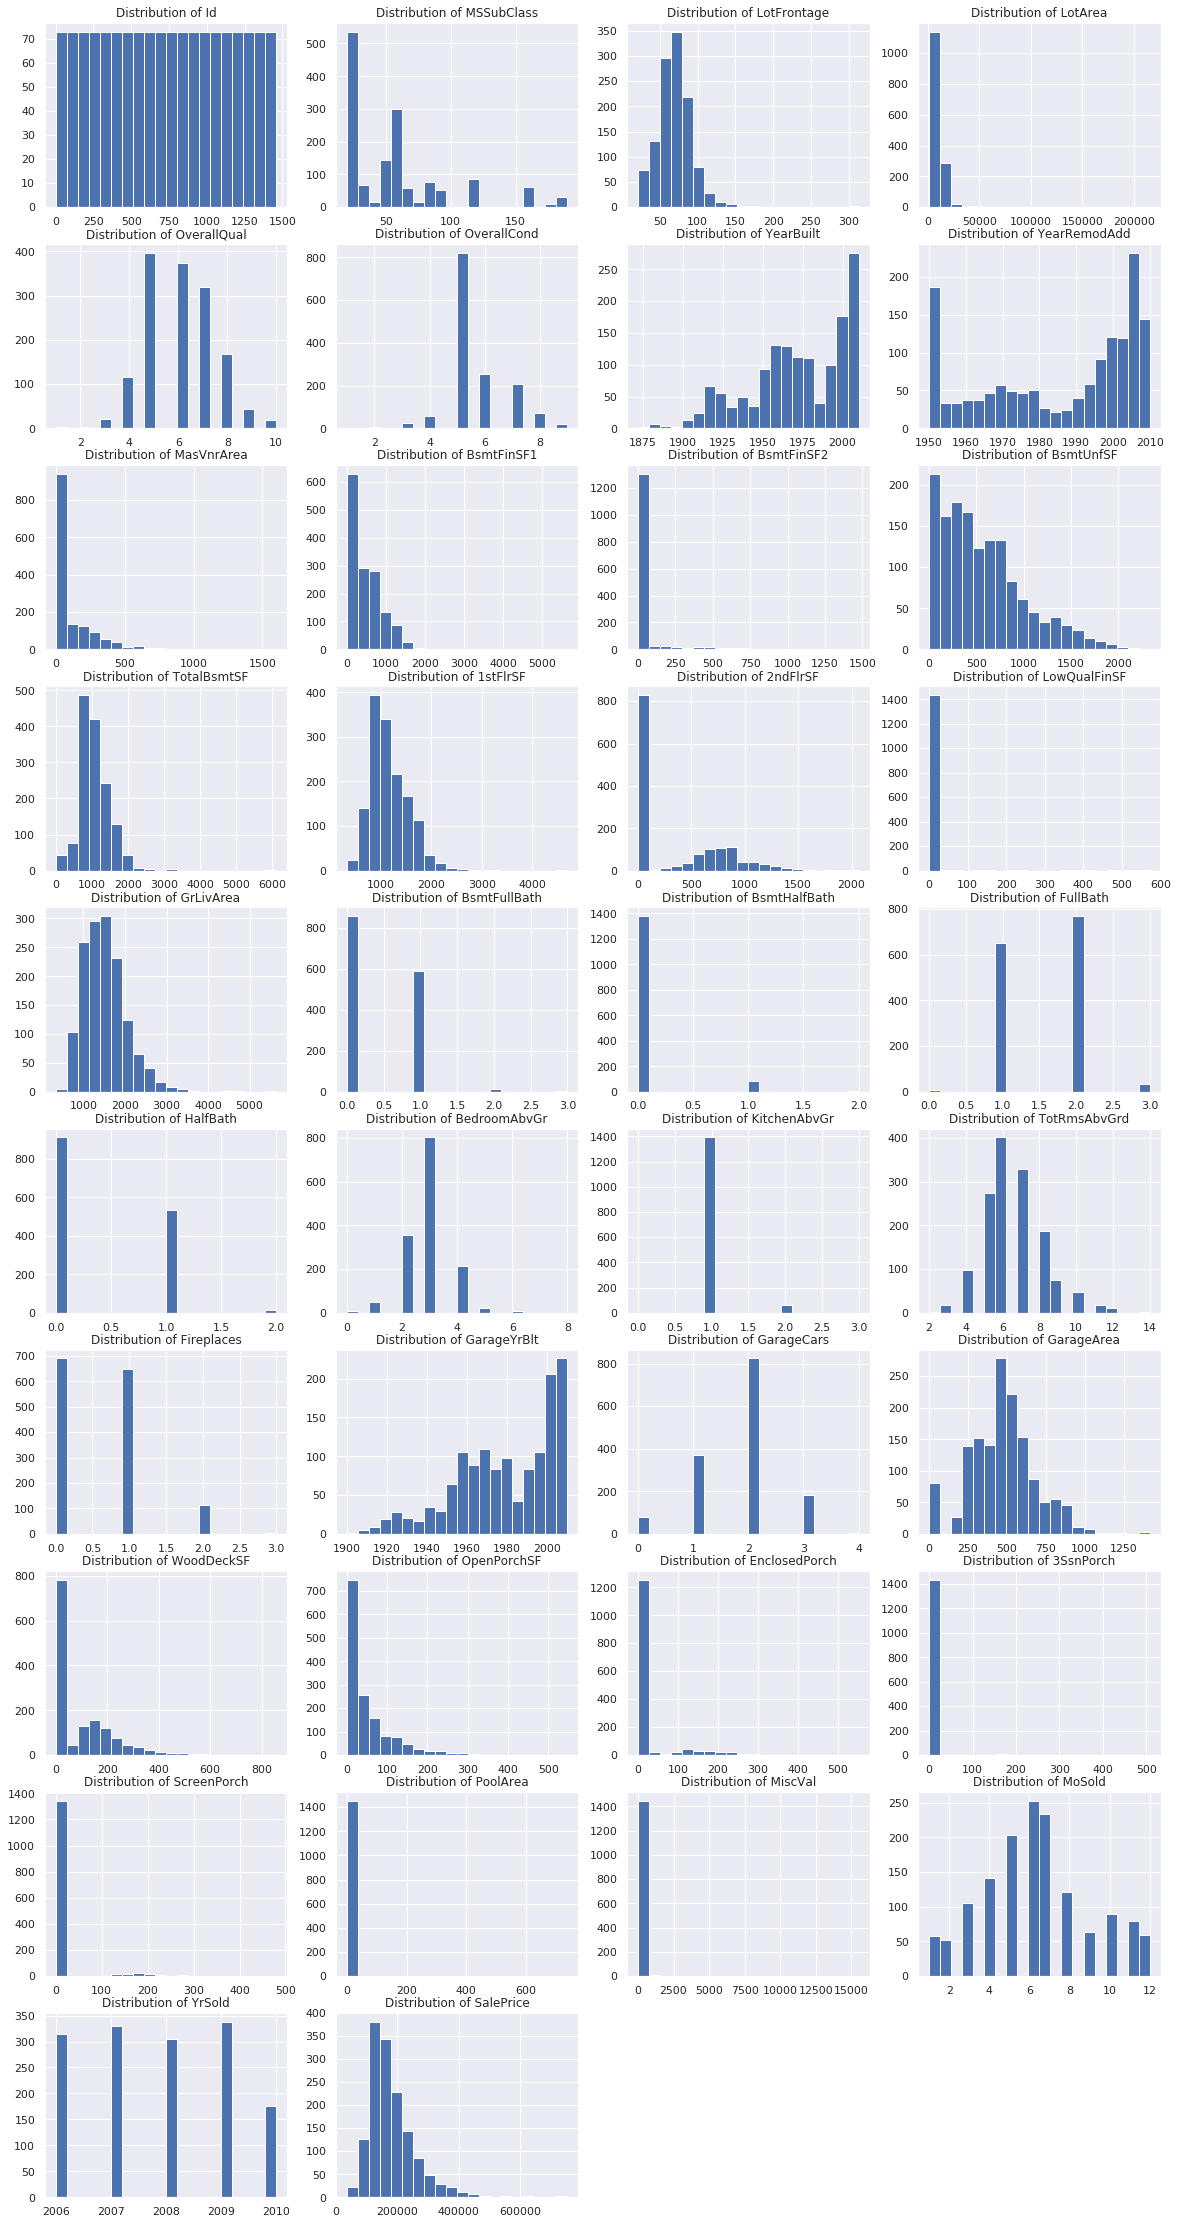

In [7]:
plot_index=1
max_plots=10
for column in df.select_dtypes(include=[np.number]).columns: 
    axes = plt.subplot(max_plots,4 , plot_index)
    axes.set_title('Distribution of '+ column)
    axes.figure.set_figheight(40)
    axes.figure.set_figwidth(20)
    axes.figure.set_tight_layout(False)
    plt.hist(df[column],bins=20)
    plot_index=plot_index+1


# >>
- as observed earlier, overall quality and condition is mostly around 5, but distribution is different, house are built with different levels of quality, but overall they all have average condition.
- Lots of features show very similar distributions: yearBuilt vs yearRemodAdd vs GarageYrBlt, totalBasmtSF vs 1stFlrSf. Those features might be highly correlated and could cause issues with certain models if we use them together.
- The yearBuilt and yearRemodAdd follow similar distribution but data seem truncated since there is a high amount of houses for 1950. If we use YearRemodAdd, we might need to group data by decades or apply some similar technique to have fairer results. 
- most house have no porch nor pool: might be interesting just to know if there is a pool / porch rather know the full surface area. 
- MoSold: sales happen more in spring / summer
- nb of sales in 2010 half than in previous years. Probably dataset stops in mid 2010, or doesn’t show all sales in that year ?
- SalesPrice shows similar distribution (skewed to the left) than totalBsmtSF. Is it directly simply correlated? We might also need to apply some transformation to those data to remove the skew.

#### Class Distribution

In [8]:
df.head()
# data["dis"]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


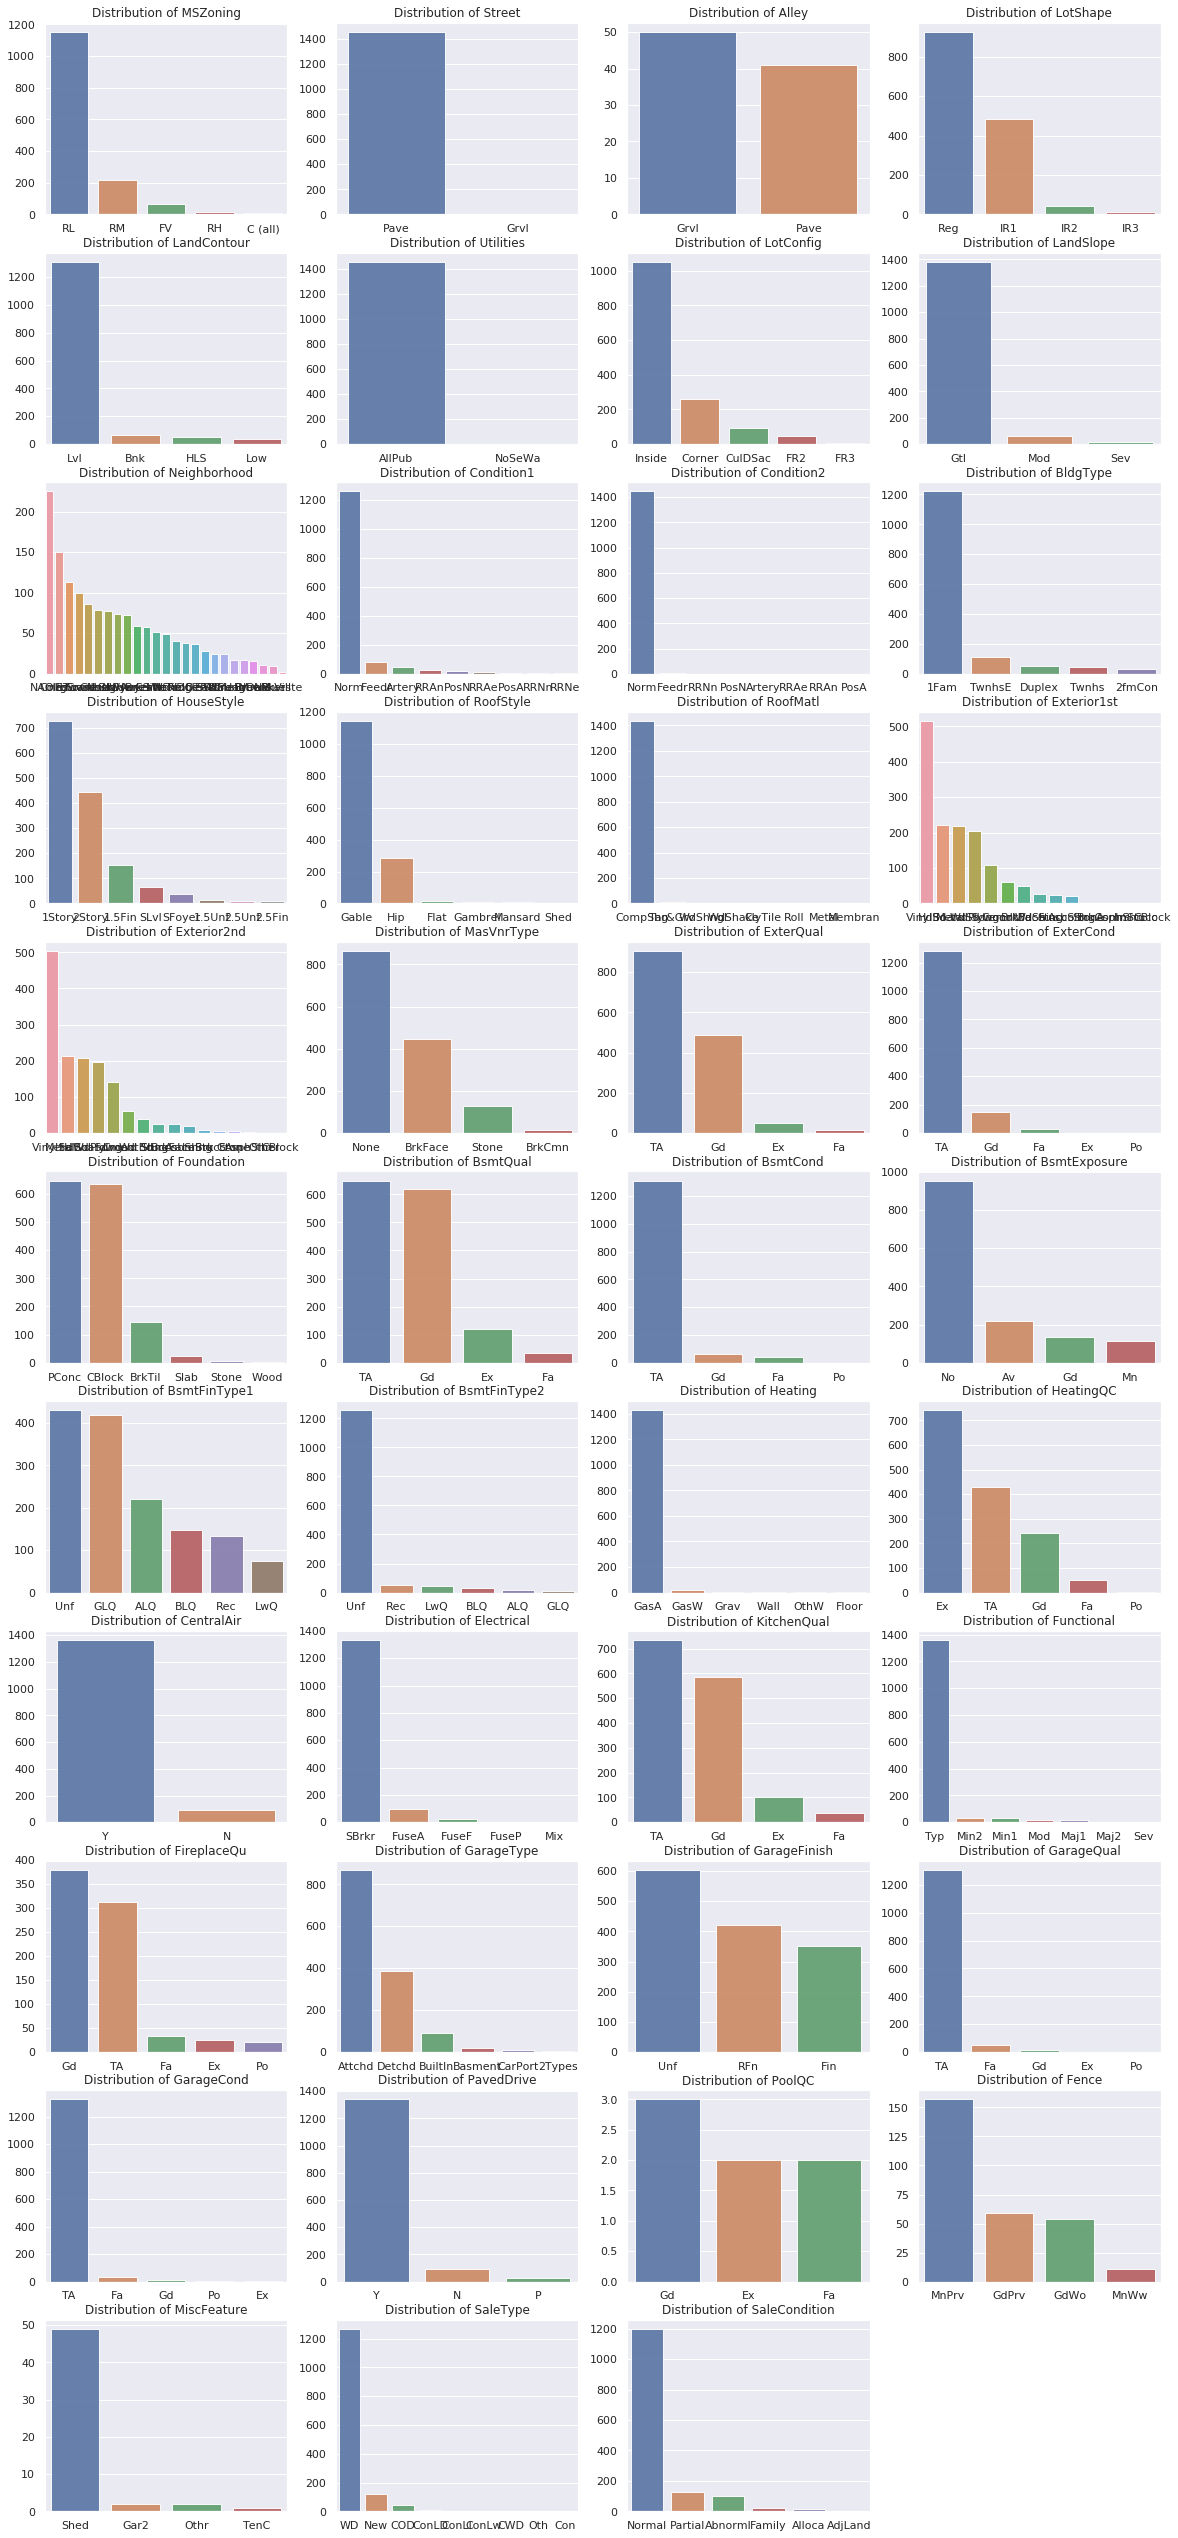

In [16]:
plot_index=1
max_plots=12
# for column in ["Street","Alley","Utilities","LotConfig","LandSlope","Neighborhood","HouseStyle","RoofStyle"]: 
for column in df.select_dtypes(include=['object']).columns:
    axes = plt.subplot(max_plots,4 , plot_index)
    
    axes.set_title('Distribution of '+ column)
    axes.figure.set_figheight(50)
    axes.figure.set_figwidth(20)
    axes.figure.set_tight_layout(False)
    carrier_count = df[column].value_counts()
    sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
    plot_index=plot_index+1


>>
Observations
- lots of categories are ordinal (poor / fair / average / good / excellent) which could be turned into numbers: all condition / quality related columns
- lots of very unbalanced categories: where we could use one hot encoding and ignore the base value: garageCondition, landContour, landSlope, RoofStyle, Heating, etc
- some categories with lots of possible values that might need grouping: Neighborhood, exterior covering of the house

### Check correlations

#### Scatter charts for numeric data

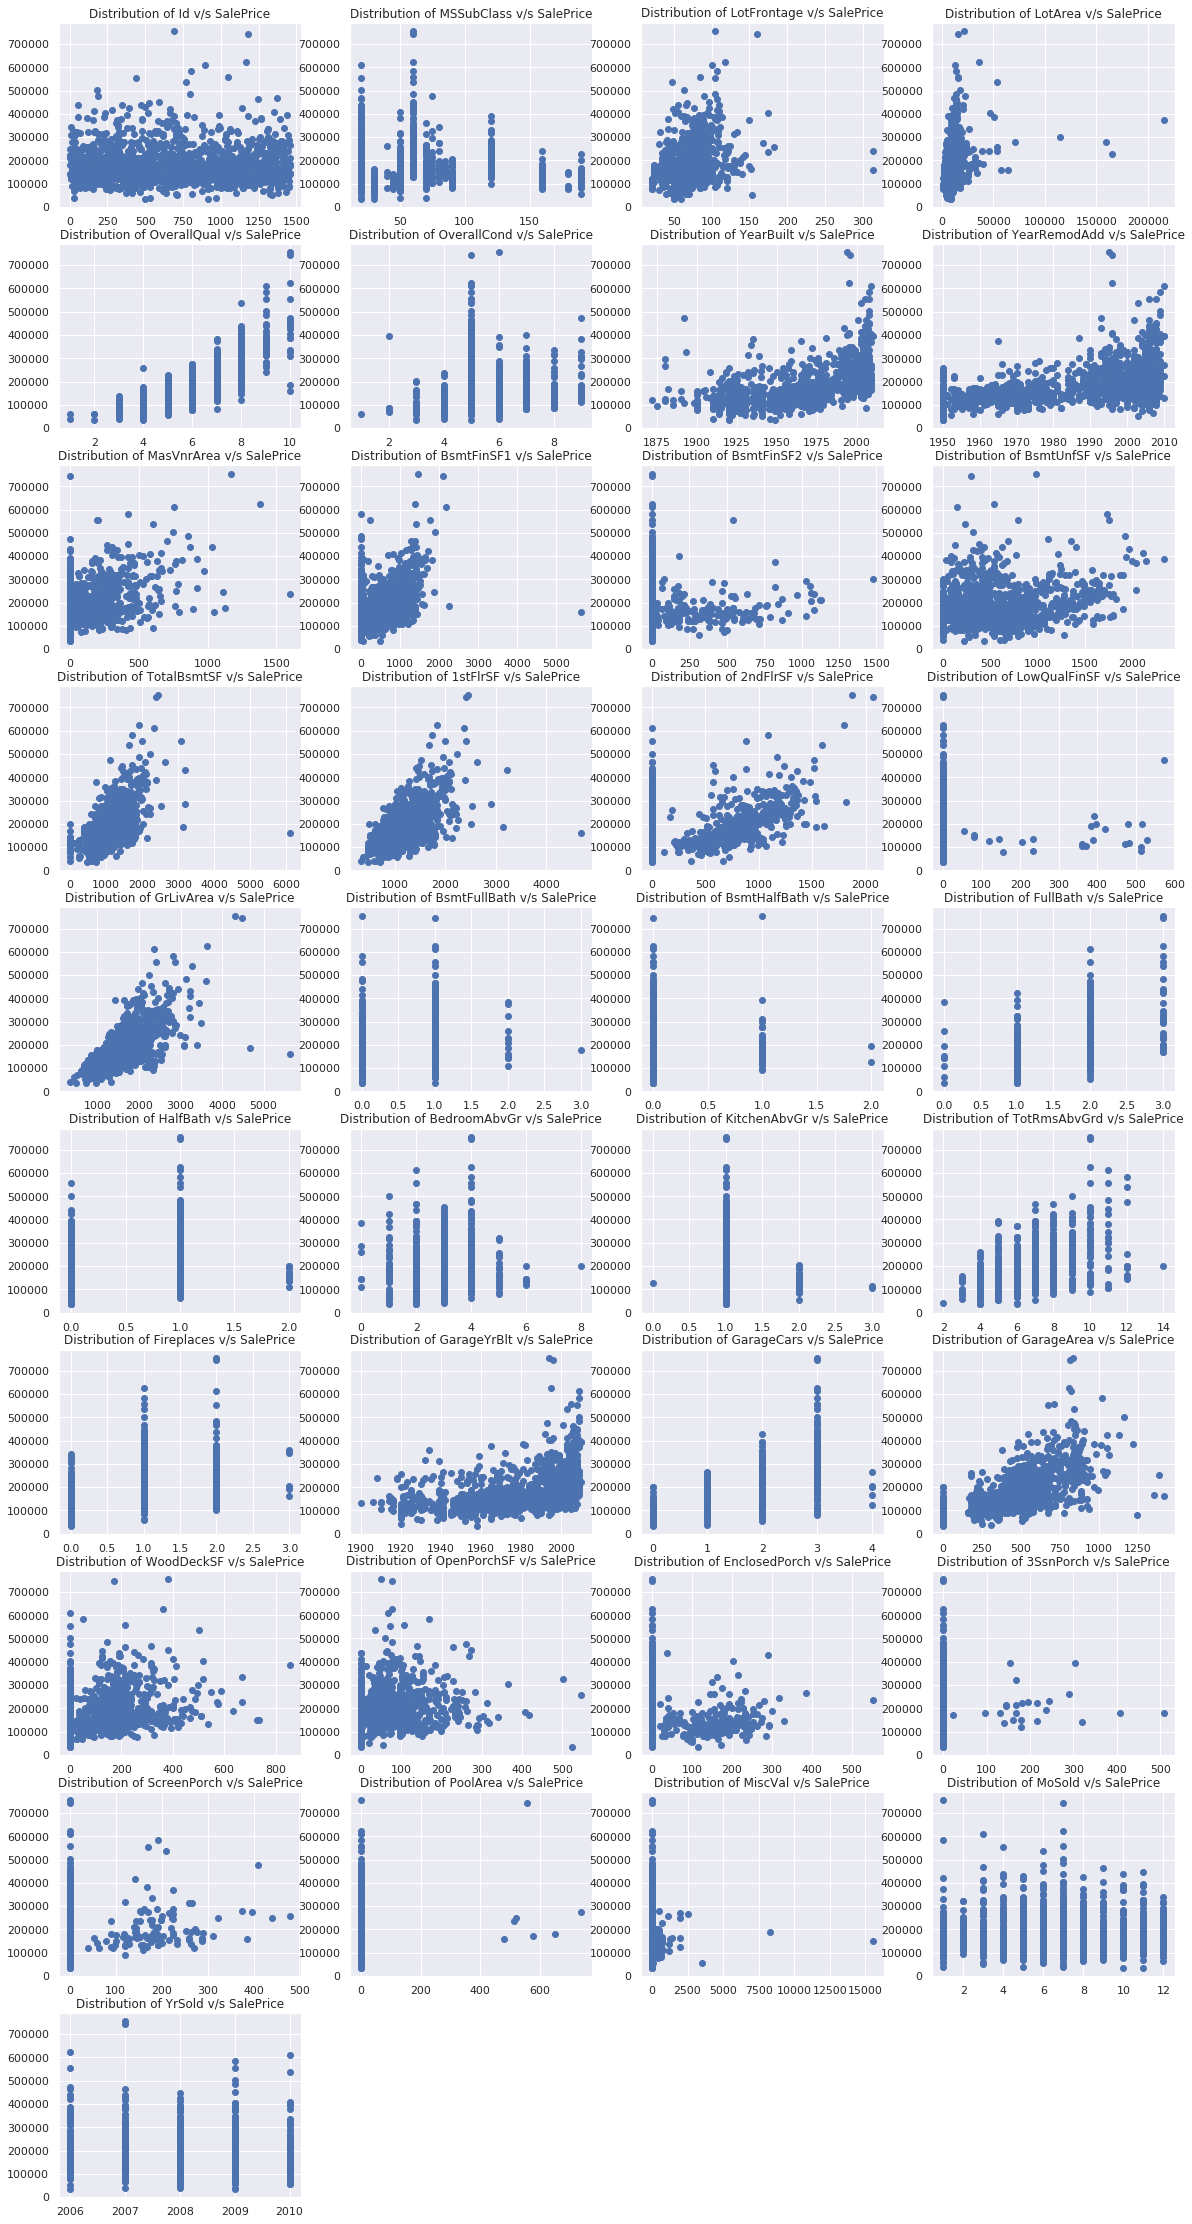

In [21]:
plot_index=1
max_plots=10
for column in df.select_dtypes(include=[np.number]).columns: 
  if column != "SalePrice":
      axes = plt.subplot(max_plots, 4, plot_index)
      axes.set_title('Distribution of '+ column + " v/s SalePrice")
      axes.figure.set_figheight(40)
      axes.figure.set_figwidth(20)
      axes.figure.set_tight_layout(False)
      plt.scatter(df[column], df["SalePrice"], marker='o')
      plot_index=plot_index+1

>>
lots of outliers which make it hard to evaluate plots (most of the points on the 1st half of the graph with a couple outliers on the right of the graph)
but we can also see obvious correlations between some features and the price.

>>
some linear:
- total basement / 1st floor / 2nd floor / living area surface with sale price

>>
more complex:
- overall quality
- year built
- full bath

>>
some with apparent lack of correlation but needs more analysis:
- pool area, screen porch

>> 
some with no correlation at all:
- Month and year of sale, Id. 
>>
etc

#### Correlation Between Attributes

Correlation refers to the relationship between two variables and how they may or may not change together.

A correlation of -1 or 1 shows a full negative (inverse) or positive (direct) correlation respectively.
A value of 0 shows no correlation at all.


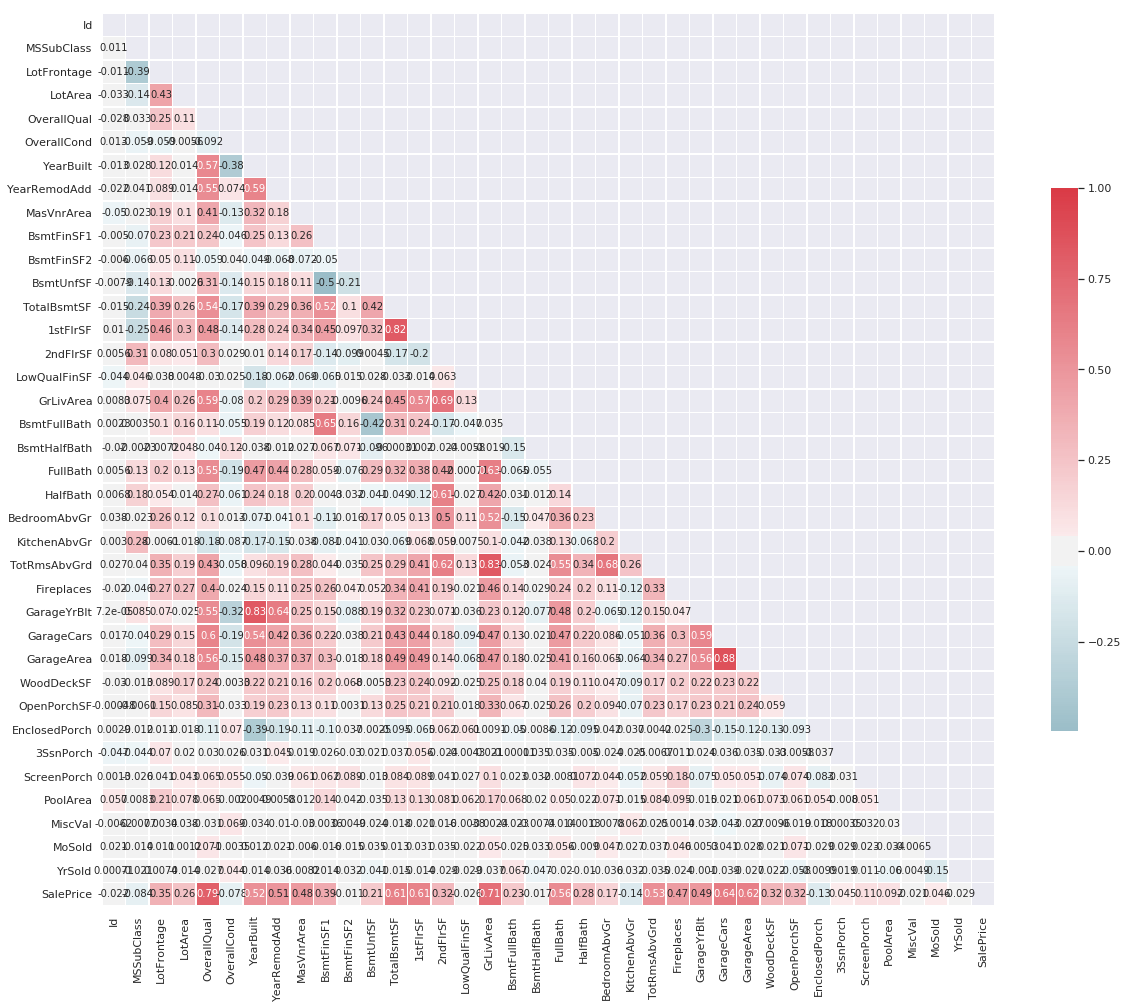

In [51]:
# Pairwise Pearson correlations
pd.set_option('display.width', 100)
pd.set_option('precision', 1)
df_corr=df[df.select_dtypes(include=[np.number]).columns];
correlations = df_corr.corr(method='pearson')
# print(correlations)
# print()
print("A correlation of -1 or 1 shows a full negative (inverse) or positive (direct) correlation respectively.") 
print("A value of 0 shows no correlation at all.")

# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True);

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},\
            annot=True)
#            )
plt.show()
# correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
# sns.heatmap(correlations, annot=True,mask=mask, cmap=cmap)

>>
Observations
- as expected since we have lots of features related to the same characteristics of a house, some features are highly correlated between themselves and should not be used together in case of some models (linear regression): garageArea with garageCars, garageYearBuilt with yearBuilt, totalRoomsAboveGrade with GrLivArea, 1stFlrSurface with total basement surface
- the presence or lack of some correlations are confirmed: id, month/year sold not correlated with price. OveralQuality, totalBasementSurface, etc correlated with sale price
- screen porch and pool area do not seem to influence price much again

#### Skew of Univariate Distributions

Skew refers to a distribution that is assumed Gaussian (normal or bell curve) that is shifted or squashed in one direction or another.

Id                0.000
MSSubClass        1.408
LotFrontage       2.164
LotArea          12.208
OverallQual       0.217
OverallCond       0.693
YearBuilt        -0.613
YearRemodAdd     -0.504
MasVnrArea        2.669
BsmtFinSF1        1.686
BsmtFinSF2        4.255
BsmtUnfSF         0.920
TotalBsmtSF       1.524
1stFlrSF          1.377
2ndFlrSF          0.813
LowQualFinSF      9.011
GrLivArea         1.367
BsmtFullBath      0.596
BsmtHalfBath      4.103
FullBath          0.037
HalfBath          0.676
BedroomAbvGr      0.212
KitchenAbvGr      4.488
TotRmsAbvGrd      0.676
Fireplaces        0.650
GarageYrBlt      -0.649
GarageCars       -0.343
GarageArea        0.180
WoodDeckSF        1.541
OpenPorchSF       2.364
EnclosedPorch     3.090
3SsnPorch        10.304
ScreenPorch       4.122
PoolArea         14.828
MiscVal          24.477
MoSold            0.212
YrSold            0.096
SalePrice         1.883
dtype: float64

The skew result show a positive (right) or negative (left) skew. Values 

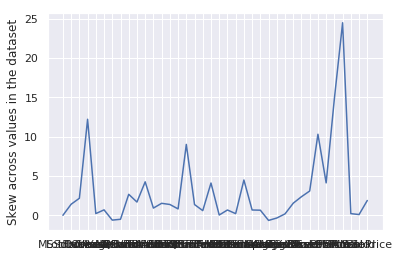

In [35]:
skew = df.skew()
print(skew)
print()
print("The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew.")

plt.plot(skew)
plt.ylabel('Skew across values in the dataset')
plt.show()

### Find issues

#### Count missing values

Count the number of missing values across all the columns

In [36]:
df[df.isnull()].count()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
                ..
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC      

#### Duplicated rows
Get stats on the number of non-unqiue or duplicate rows in a dataset

In [40]:
print("Duplicate rows count", df.duplicated().count())
df[df.duplicated()]

Duplicate rows count 1460


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


### Please refer to the [Slides](http://bit.ly/do-you-know-your-data) for the step here after.